In [13]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(),'model'))

import jax
import sys
import random
import os
import numpy as np
from processes.all_processes import Matrix_1_epem_mupmum
from model.parameters import ModelParameters
from phase_space_generator.flat_phase_space_generator import FlatInvertiblePhasespace, LorentzVectorList, LorentzVector
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
active_model = ModelParameters(None)
def matrix_element(x):
    e = 90.0
    theta = x

        
    process = Matrix_1_epem_mupmum()

    
    vectors = [
        [e/2,0,0, e/2],
        [e/2,0,0,-e/2],
        [e/2, 0, e/2*jax.numpy.sin(theta), e/2*jax.numpy.cos(theta)],
        [e/2, 0,-e/2*jax.numpy.sin(theta),-e/2*jax.numpy.cos(theta)],
    ]

    PS_point = LorentzVectorList(LorentzVector(v) for v in vectors)
    return process.smatrix(PS_point, active_model)[0]


matrix_element_prime = jax.grad(matrix_element)

In [8]:
angles = np.linspace(0,np.pi)

In [9]:
mevals = np.asarray([matrix_element(a) for a in angles])

In [11]:
meprime = np.asarray([matrix_element_prime(a) for a in angles])

/Users/lukasheinrich/Code/me/MG5aMC_PythonMEs_output_example/venv/lib/python2.7/site-packages/jax/lax/lax.py:1874: ComplexWarning: Casting complex values to real discards the imaginary part
  lambda t, new_dtype, old_dtype: [convert_element_type(t, old_dtype)])


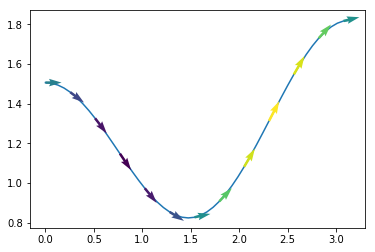

In [24]:
every_n = 4
plt.plot(angles,mevals)
plt.quiver(
    angles[::every_n],mevals[::every_n],np.ones_like(angles)[::every_n],meprime[::every_n],meprime[::every_n],
    units = 'xy', angles = 'xy', zorder = 99
)